In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

pd.set_option('display.max_columns', None)

In [20]:
df = pd.read_csv("../raw_data/FC26_20250921.csv", low_memory=False)

In [21]:
# In-game 'boost' columns not relevant
drop_cols = df.columns[-28:-1]
df = df.drop(columns=drop_cols)

# Work rate column empty
df = df.drop(columns=['work_rate'])

In [22]:
# Numerical and Categorical features
features_columns = ['player_id', 'player_positions',
       'overall', 'potential', 'height_cm', 'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

In [23]:
# Additional profiling features used for filtering down the line
info_columns = ['player_id', 'player_url', 'short_name', 'long_name',
       'value_eur', 'wage_eur', 'age', 'dob', 'league_id', 'league_name',
       'league_level', 'club_team_id', 'club_name', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits',
       'player_face_url']

In [24]:
# Create features and info dataframes
player_features_df = df[features_columns]
player_info_df =  df[info_columns]

In [25]:
# Convert player position string into list of positions
player_features_df['player_positions'] = player_features_df['player_positions'].apply(lambda x: x.split(', '))

# Take the first given position as a player's primary position (new column)
player_features_df['primary_position'] = player_features_df['player_positions'].apply(lambda x : x[0])

/var/folders/wj/lx4t_2jn1yj_5b10vjr83fz00000gn/T/ipykernel_45507/3839546970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df['player_positions'] = player_features_df['player_positions'].apply(lambda x: x.split(', '))
/var/folders/wj/lx4t_2jn1yj_5b10vjr83fz00000gn/T/ipykernel_45507/3839546970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df['primary_position'] = player_features_df['player_positions'].apply(lambda x : x[0])


In [26]:
numeric_columns = ['overall', 'potential', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves',
                'international_reputation', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
                'physic', 'attacking_crossing', 'attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
                'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                'movement_reactions', 'movement_balance', 'power_shot_power',
                'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                'mentality_aggression', 'mentality_interceptions',
                'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                'mentality_composure', 'defending_marking_awareness',
                'defending_standing_tackle', 'defending_sliding_tackle',
                'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

categorical_columns = ['preferred_foot', 'player_positions', 'primary_position']

In [27]:
# MinMax scale numerical features
mm_scaler = MinMaxScaler()
player_features_df[numeric_columns] = mm_scaler.fit_transform(player_features_df[numeric_columns])

/var/folders/wj/lx4t_2jn1yj_5b10vjr83fz00000gn/T/ipykernel_45507/1480969605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df[numeric_columns] = mm_scaler.fit_transform(player_features_df[numeric_columns])


In [28]:
# One Hot Encode categorical features
# OHE player primary positions
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(player_features_df[['primary_position']])
player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['primary_position']])

# OHE player preffered foot
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(player_features_df[['preferred_foot']])
player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['preferred_foot']])

# Drop the original categorical columns
player_features_df = player_features_df.drop(columns=categorical_columns)


/var/folders/wj/lx4t_2jn1yj_5b10vjr83fz00000gn/T/ipykernel_45507/3715107006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['primary_position']])
/var/folders/wj/lx4t_2jn1yj_5b10vjr83fz00000gn/T/ipykernel_45507/3715107006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['primary_position']])
/var/folders/wj/lx4t_2jn1yj_5b10vjr83fz00000

In [29]:
# Fill in NaNs

# 0 for goalkeeping speed for all outfield players
player_features_df['goalkeeping_speed'] = player_features_df['goalkeeping_speed'].fillna(0)

# 0 for grouped outfield attribute scores for goalkeepers
columns_to_fill = ['pace', 'physic', 'defending', 'passing', 'shooting', 'dribbling']
player_features_df[columns_to_fill] = player_features_df[columns_to_fill].fillna(0)

In [30]:
player_features_df

,player_id,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position_CAM,primary_position_CB,primary_position_CDM,primary_position_CM,primary_position_GK,primary_position_LB,primary_position_LM,primary_position_LW,primary_position_RB,primary_position_RM,primary_position_RW,primary_position_ST,preferred_foot_Left,preferred_foot_Right
0,252371,0.977273,0.978261,0.563636,0.482759,0.75,0.75,1.00,0.746269,0.915493,0.865672,0.957746,0.840000,0.898305,0.689655,0.933333,0.793103,0.962963,0.831461,0.966292,0.767442,0.701149,0.952381,0.964706,0.804878,0.797619,0.851351,0.953125,0.840000,0.891892,0.852941,0.987952,0.788732,0.954023,0.891566,0.894118,0.956522,0.9750,0.784091,0.961538,0.837209,0.857143,0.855422,0.136364,0.102273,0.089888,0.034091,0.068182,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,239053,0.954545,0.891304,0.490909,0.465517,0.75,0.50,0.75,0.865672,0.887324,0.880597,0.873239,0.906667,0.898305,0.827586,0.844444,0.655172,0.938272,0.842697,0.887640,0.802326,0.712644,0.940476,0.929412,0.841463,0.940476,0.770270,0.921875,0.640000,0.959459,0.808824,0.975904,0.816901,1.000000,0.843373,0.941176,0.902174,0.9250,0.613636,0.884615,0.895349,0.952381,0.963855,0.045455,0.090909,0.044944,0.147727,0.068182,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,212622,0.954545,0.869565,0.400000,0.482759,0.75,0.50,0.75,0.626866,0.746479,0.955224,0.873239,0.906667,0.796610,0.988506,0.711111,0.758621,0.950617,0.741573,0.865169,0.906977,0.827586,0.988095,0.905882,0.731707,0.678571,0.851351,0.921875,0.853333,0.783784,0.735294,0.963855,0.633803,0.908046,0.939759,0.929412,0.815217,0.9250,0.750000,0.910256,0.895349,0.940476,0.951807,0.068182,0.147727,0.056180,0.147727,0.147727,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,235212,0.954545,0.891304,0.472727,0.448276,0.75,0.75,0.75,0.925373,0.816901,0.850746,0.859155,0.893333,0.796610,0.908046,0.844444,0.747126,0.913580,0.797753,0.865169,0.825581,0.839080,0.761905,0.894118,0.902439,0.976190,0.824324,0.937500,0.773333,0.837838,0.838235,1.000000,0.676056,0.839080,0.795181,0.929412,0.880435,0.8250,0.715909,0.884615,0.895349,0.928571,0.879518,0.090909,0.068182,0.134831,0.045455,0.068182,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,224232,0.909091,0.826087,0.363636,0.362069,0.75,0.50,0.75,0.746269,0.802817,0.880597,0.901408,0.880000,0.745763,0.839080,0.811111,0.620690,0.950617,0.865169,0.887640,0.837209,0.689655,0.928571,0.917647,0.817073,0.773810,0.959459,0.953125,0.906667,0.810811,0.705882,0.927711,0.591549,0.862069,0.915663,0.929412,0.880435,0.9125,0.772727,0.935897,0.872093,0.928571,0.891566,0.102273,0.034091,0.123596,0.136364,0.102273,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,267946,0.022727,0.108696,0.709091,0.741379,0.25,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.044444,0.068966,0.135802,0.056180,0.056180,0.023256,0.034483,0.154762,0.082353,0.134146,0.059524,0.0

In [31]:
# Assign features df to X, with player ID as the index
X = player_features_df.copy()
X.set_index('player_id', inplace=True)

In [32]:
X

,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position_CAM,primary_position_CB,primary_position_CDM,primary_position_CM,primary_position_GK,primary_position_LB,primary_position_LM,primary_position_LW,primary_position_RB,primary_position_RM,primary_position_RW,primary_position_ST,preferred_foot_Left,preferred_foot_Right
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
252371,0.977273,0.978261,0.563636,0.482759,0.75,0.75,1.00,0.746269,0.915493,0.865672,0.957746,0.840000,0.898305,0.689655,0.933333,0.793103,0.962963,0.831461,0.966292,0.767442,0.701149,0.952381,0.964706,0.804878,0.797619,0.851351,0.953125,0.840000,0.891892,0.852941,0.987952,0.788732,0.954023,0.891566,0.894118,0.956522,0.9750,0.784091,0.961538,0.837209,0.857143,0.855422,0.136364,0.102273,0.089888,0.034091,0.068182,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
239053,0.954545,0.891304,0.490909,0.465517,0.75,0.50,0.75,0.865672,0.887324,0.880597,0.873239,0.906667,0.898305,0.827586,0.844444,0.655172,0.938272,0.842697,0.887640,0.802326,0.712644,0.940476,0.929412,0.841463,0.940476,0.770270,0.921875,0.640000,0.959459,0.808824,0.975904,0.816901,1.000000,0.843373,0.941176,0.902174,0.9250,0.613636,0.884615,0.895349,0.952381,0.963855,0.045455,0.090909,0.044944,0.147727,0.068182,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212622,0.954545,0.869565,0.400000,0.482759,0.75,0.50,0.75,0.626866,0.746479,0.955224,0.873239,0.906667,0.796610,0.988506,0.711111,0.758621,0.950617,0.741573,0.865169,0.906977,0.827586,0.988095,0.905882,0.731707,0.678571,0.851351,0.921875,0.853333,0.783784,0.735294,0.963855,0.633803,0.908046,0.939759,0.929412,0.815217,0.9250,0.750000,0.910256,0.895349,0.940476,0.951807,0.068182,0.147727,0.056180,0.147727,0.147727,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
235212,0.954545,0.891304,0.472727,0.448276,0.75,0.75,0.75,0.925373,0.816901,0.850746,0.859155,0.893333,0.796610,0.908046,0.844444,0.747126,0.913580,0.797753,0.865169,0.825581,0.839080,0.761905,0.894118,0.902439,0.976190,0.824324,0.937500,0.773333,0.837838,0.838235,1.000000,0.676056,0.839080,0.795181,0.929412,0.880435,0.8250,0.715909,0.884615,0.895349,0.928571,0.879518,0.090909,0.068182,0.134831,0.045455,0.068182,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
224232,0.909091,0.826087,0.363636,0.362069,0.75,0.50,0.75,0.746269,0.802817,0.880597,0.901408,0.880000,0.745763,0.839080,0.811111,0.620690,0.950617,0.865169,0.887640,0.837209,0.689655,0.928571,0.917647,0.817073,0.773810,0.959459,0.953125,0.906667,0.810811,0.705882,0.927711,0.591549,0.862069,0.915663,0.929412,0.880435,0.9125,0.772727,0.935897,0.872093,0.928571,0.891566,0.102273,0.034091,0.123596,0.136364,0.102273,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267946,0.022727,0.108696,0.709091,0.741379,0.25,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.044444,0.068966,0.135802,0.056180,0.056180,0.023256,0.0344

In [33]:
# Positional groups and longer positional names if needed

# Map primary position to broader groups
position_groups = {
    'ST': 'Forward', 'CF': 'Forward', 'LW': 'Forward', 'RW': 'Forward',
    'CAM': 'Midfielder', 'CM': 'Midfielder', 'CDM': 'Midfielder', 'LM': 'Midfielder', 'RM': 'Midfielder',
    'CB': 'Defender', 'LB': 'Defender', 'RB': 'Defender', 'LWB': 'Defender', 'RWB': 'Defender',
    'GK': 'Goalkeeper'
}
# player_features_df['position_group'] = player_features_df['primary_position'].map(position_groups).fillna('Other')

# Dictionary matching long position names to short
{'CM': 'Central Midfielder',
'CB': 'Central Defender',
'RM': 'Right Midfielder',
'LM': 'Left Midfielder',
'ST': 'Striker',
'CAM': 'Central Attacking Midfielder',
'CDM': 'Central Defensive Midfielder',
'RB': 'Right Fullback',
'LB': 'Left Fullback',
'GK': 'Goalkeeper',
'LW': 'Left Winger',
'RW': 'Right Winger'}

{'CM': 'Central Midfielder',
 'CB': 'Central Defender',
 'RM': 'Right Midfielder',
 'LM': 'Left Midfielder',
 'ST': 'Striker',
 'CAM': 'Central Attacking Midfielder',
 'CDM': 'Central Defensive Midfielder',
 'RB': 'Right Fullback',
 'LB': 'Left Fullback',
 'GK': 'Goalkeeper',
 'LW': 'Left Winger',
 'RW': 'Right Winger'}

In [34]:
X.to_csv("../raw_data/pp.csv")

In [36]:
pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 27.1 MB/s  0:00:00 eta 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.4 MB/s  0:00:00m0:00:01
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
skill_cols = [c for c in X.columns if any(k in c.lower() for k in [
    'pace','shoot','pass','drib','defend','physic',
    'attacking','skill','movement','power','mentality'
])]
body_cols = [c for c in X.columns if c.lower() in ['height_cm','weight_kg','overall','potential']]
feature_cols = list(set(skill_cols + body_cols))

In [40]:
X = X[feature_cols].copy()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [42]:
explained_variance = np.round(pca.explained_variance_ratio_ * 100, 2)

<Axes: >

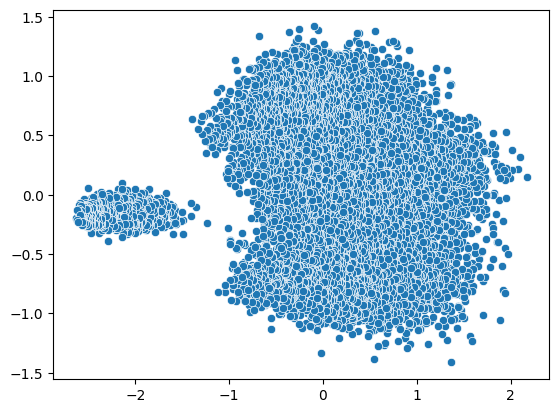

In [44]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])

<Axes: >

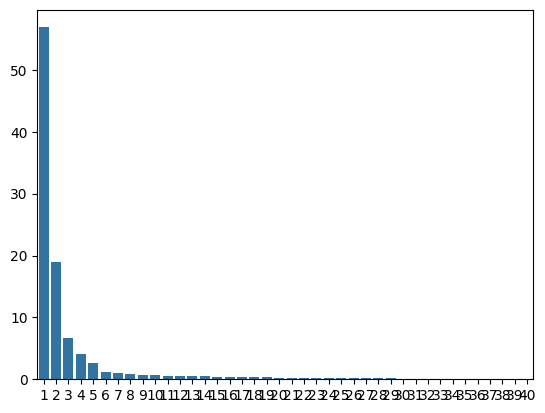

In [45]:
sns.barplot(x=list(range(1, len(explained_variance)+1)), y=explained_variance)

In [52]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
print(to_drop)

['defending', 'defending_sliding_tackle', 'skill_curve', 'skill_ball_control', 'attacking_short_passing', 'attacking_crossing', 'movement_acceleration', 'mentality_interceptions', 'pace', 'power_long_shots', 'shooting', 'skill_long_passing', 'dribbling', 'attacking_finishing', 'skill_dribbling', 'defending_standing_tackle']


In [53]:
X_reduced = X.drop(columns=to_drop)

In [61]:
# use variance Threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_filtered = selector.fit_transform(X_reduced)
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_filtered)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [62]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=selector.get_feature_names_out(X_reduced.columns)
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
mentality_composure,0.203046,0.030698,-0.130419,0.172578,-0.026394,-0.007718,-0.034876,0.140665,-0.021792,-0.037112,0.286683,-0.160283,-0.241285,-0.067091,-0.152938,0.611347,0.172397,-0.416174,-0.301956,0.015495,-0.105800,-0.066901,-0.091527,0.036176
movement_agility,0.235701,-0.238754,0.138068,0.025532,0.360261,-0.212766,0.083711,0.038382,-0.241299,0.105870,0.038704,-0.040439,-0.397076,-0.039628,0.637530,0.025750,-0.101362,0.113123,-0.078809,-0.021228,0.095690,-0.023261,0.073070,-0.022485
skill_fk_accuracy,0.241767,-0.151887,-0.058303,-0.008356,-0.330841,-0.106488,0.121400,0.018003,-0.316003,-0.255310,-0.391314,0.219830,-0.174268,0.421443,-0.052604,-0.175167,0.267822,-0.179146,-0.081876,0.092446,-0.084036,-0.176860,0.115267,0.022919
mentality_aggression,0.220188,0.264865,0.187665,0.065402,-0.154326,0.000066,-0.236539,0.113764,0.065505,0.691104,-0.161013,-0.161783,-0.213037,0.246235,-0.086352,-0.048565,0.083759,0.099759,0.086416,-0.010104,-0.163736,0.040271,-0.075604,-0.201563
defending_marking_awareness,0.206778,0.335867,0.456469,0.371890,-0.233943,0.092795,0.135264,0.006655,-0.347398,-0.206916,0.033670,-0.089038,0.120929,-0.278662,0.002754,-0.036489,-0.302169,0.069225,0.037196,0.058892,-0.179135,-0.123879,0.019874,0.033656


In [63]:
!pwd

/Users/menghangao/code/arundelljr/MoneyBaller/Notebooks
